In [1]:
!pip install matplotlib

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rcParams

import os
import matplotlib as mpl
 
# Set the path to the custom matplotlibrc file
custom_rc_path = os.path.abspath('../../_configs/matplotlibrc.txt')

# Load the custom settings
mpl.rc_file('../../_configs/matplotlibrc.txt')

directory = '../figs/'

'STIXTwoMath.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


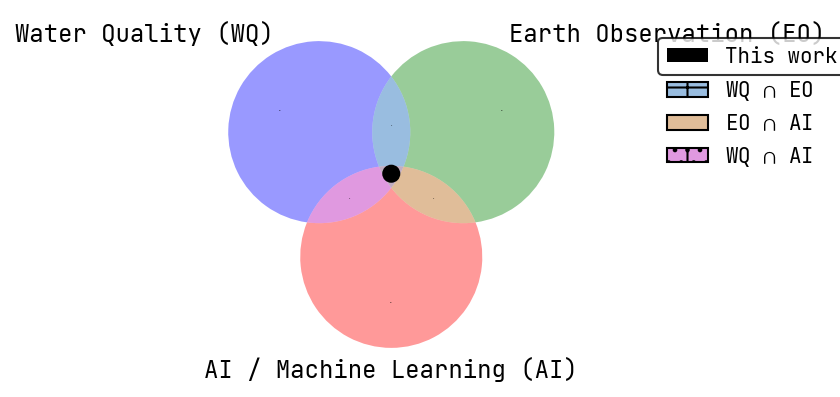

In [2]:
# Dimensions search results 

# Create the figure with the specified DPI and size
fig, ax = plt.subplots()
venn_diagram = venn3(subsets = (30, 30, 2, 30, 2, 2, 2), set_labels = ('Water Quality (WQ)', 'Earth Observation (EO)', 'AI / Machine Learning (AI)'), set_colors=('blue', 'green', 'red'));
#c = venn3_circles(subsets = (30, 30, 2, 30, 2, 2, 2), linestyle='dashed', linewidth=1, color="grey")

# Customize the text and make it look more professional
for text in venn_diagram.set_labels:
  text.set_fontsize(11.5)

for text in venn_diagram.subset_labels:
  text.set_fontsize(0)

    # Add textures to the patches
venn_diagram.get_patch_by_id('100').set_hatch('|')
venn_diagram.get_patch_by_id('010').set_hatch('-')
venn_diagram.get_patch_by_id('110').set_hatch('+')
venn_diagram.get_patch_by_id('001').set_hatch('.')
venn_diagram.get_patch_by_id('011').set_hatch('%')
venn_diagram.get_patch_by_id('101').set_hatch('.|.')

    # Add arrows and labels
#ax.annotate('WQ + EO', xy=(-0, 0.15), xytext=(0, 0.3), fontsize=10, arrowprops=dict(facecolor='black', arrowstyle='->'))
#ax.annotate('WQ + ML', xy=(-0.12, -0.09), xytext=(-0.36, -0.27), fontsize=10, arrowprops=dict(facecolor='black', arrowstyle='->'))
#ax.annotate('EO + ML', xy=(0.12, -0.09), xytext=(0.36, -0.27), fontsize=10, arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add red circle and legend
center_circle = plt.Circle((0, 0), 0.03, color='black', clip_on=False)
ax.add_artist(center_circle)

def getviz(venn, flags):
  color = venn_diagram.get_patch_by_id(flags).get_facecolor()
  hatch = venn_diagram.get_patch_by_id(flags).get_hatch()
  return color, hatch

# Define custom patches for legend
legend_patches = [
                   Patch(facecolor=venn_diagram.get_patch_by_id('110').get_facecolor(), hatch=venn_diagram.get_patch_by_id('110').get_hatch(), edgecolor='k', label='WQ $∩$ EO'),
                   Patch(facecolor=venn_diagram.get_patch_by_id('011').get_facecolor(), hatch=venn_diagram.get_patch_by_id('011').get_hatch(), edgecolor='k', label='EO $∩$ AI'),
                   Patch(facecolor=venn_diagram.get_patch_by_id('101').get_facecolor(), hatch=venn_diagram.get_patch_by_id('101').get_hatch(), edgecolor='k', label='WQ $∩$ AI')]

legend_elem = [Patch(facecolor='black', label='This work'),]
# Add legend to the plot without background and outline
fig.legend(handles=legend_patches, loc='lower left', bbox_to_anchor=(0.72, 0.35), fontsize=10, frameon=False, edgecolor='none')
fig.legend(handles=legend_elem, loc='lower left', bbox_to_anchor=(0.72, 0.52), fontsize=10, frameon=True, edgecolor='k')

plt.savefig(directory + 'thiswork_venn_diagram.pdf')
plt.show()

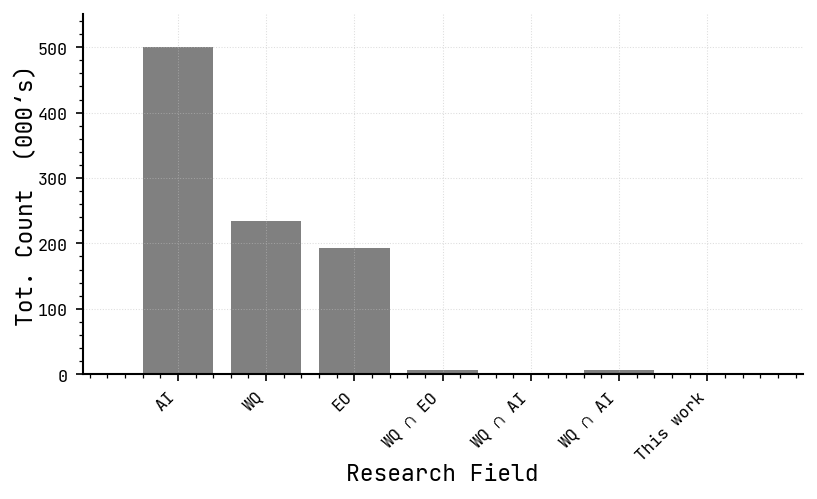

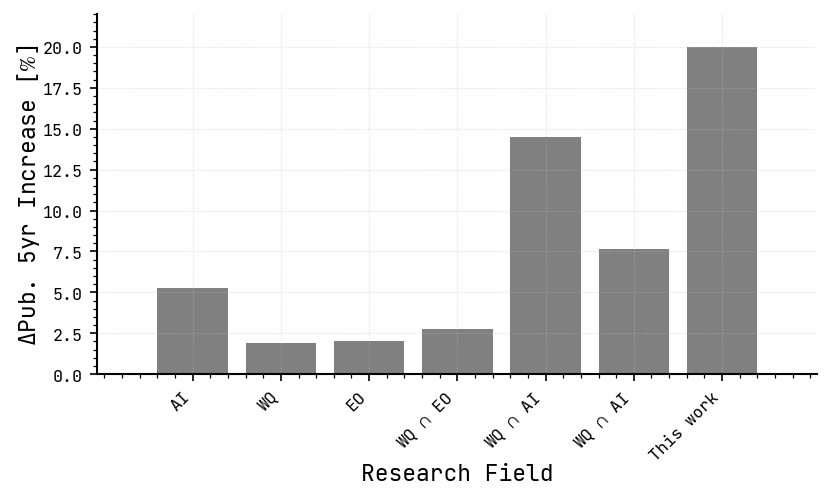

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

categories = ['AI', 'WQ', 'EO',
              'WQ $∩$ EO', 'WQ $∩$ AI',
              "WQ $∩$ AI", 'This work']
'''
"ml" 
"wq"
"eo"
'''
#publication number
n_ml = 500564
n_wq = 233816
n_eo = 193625
n_wqeo = 7049
n_wqml = 2237
n_eoml = 6372
n_all = 305


#total publications in 2022 divided by total in 2017 (relative 5 year change)
rd_ml = 114752/21822
rd_wq = 22246/11754
rd_rs = 20256/10015
rd_wqrs = 974/349
rd_wqml = 755/52
rd_rsml = 1697/221
rd_all = 100/5

# Publication numbers
n_values = [500564, 233816, 193625, 7049, 2237, 6372, 305]

# Relative 5-year change
rd_values = [114752/21822, 22246/11754, 20256/10015, 974/349, 755/52, 1697/221, 100/5]

def create_bar_chart(data, title, ylabel, filename):
    fig, ax = plt.subplots()
    bar_width = 0.8
    index = np.arange(len(categories))
    
    # Scale data and adjust ylabel if values are over 10000
    scale_factor = 1
    if max(data) > 10000:
        scale_factor = 1000
        ylabel += '  (000‘s)'
        data = [d / scale_factor for d in data]
    
    ax.bar(index, data, bar_width, color='grey')
    ax.set_xlabel('Research Field')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(categories, rotation=45, ha='right')

    plt.savefig(filename)
    plt.show()

create_bar_chart(n_values, '', 'Τοt. Count', directory + 'publications_bar_chart.png')
create_bar_chart(rd_values, '', 'ΔPub. 5yr Increase [$\%$]', directory + 'relative_change_bar_chart.png')

